In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the planets dataset
planets_data = sns.load_dataset("planets")

planets_data_step = planets_data[planets_data.mass > 0]
planets_data = planets_data_step[planets_data.distance > 0]

# Display the first few rows of the dataset
print(planets_data.head())


            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


C:\Users\User\AppData\Local\Temp\ipykernel_11192\3908646506.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  planets_data = planets_data_step[planets_data.distance > 0]


In [3]:
# Fill NaN values with the mean before calculating summary statistics
print(planets_data[planets_data.mass > 0])

              method  number  orbital_period    mass  distance  year
0    Radial Velocity       1       269.30000   7.100     77.40  2006
1    Radial Velocity       1       874.77400   2.210     56.95  2008
2    Radial Velocity       1       763.00000   2.600     19.84  2011
3    Radial Velocity       1       326.03000  19.400    110.62  2007
4    Radial Velocity       1       516.22000  10.500    119.47  2009
..               ...     ...             ...     ...       ...   ...
640  Radial Velocity       1       111.70000   2.100     14.90  2009
641  Radial Velocity       1         5.05050   1.068     44.46  2013
642  Radial Velocity       1       311.28800   1.940     17.24  1999
649          Transit       1         2.70339   1.470    178.00  2013
784  Radial Velocity       3       580.00000   0.947    135.00  2012

[498 rows x 6 columns]


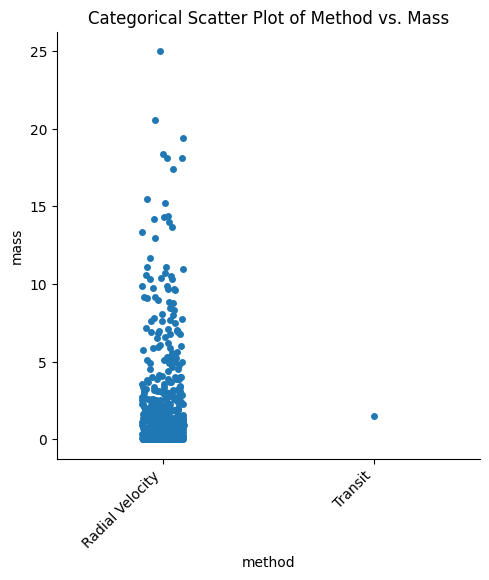

In [4]:
# Categorical scatter plot of method vs. mass using the modified DataFrame with NaN values filled
sns.catplot(x="method", y="mass", data=planets_data, jitter=True)
plt.title("Categorical Scatter Plot of Method vs. Mass")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()

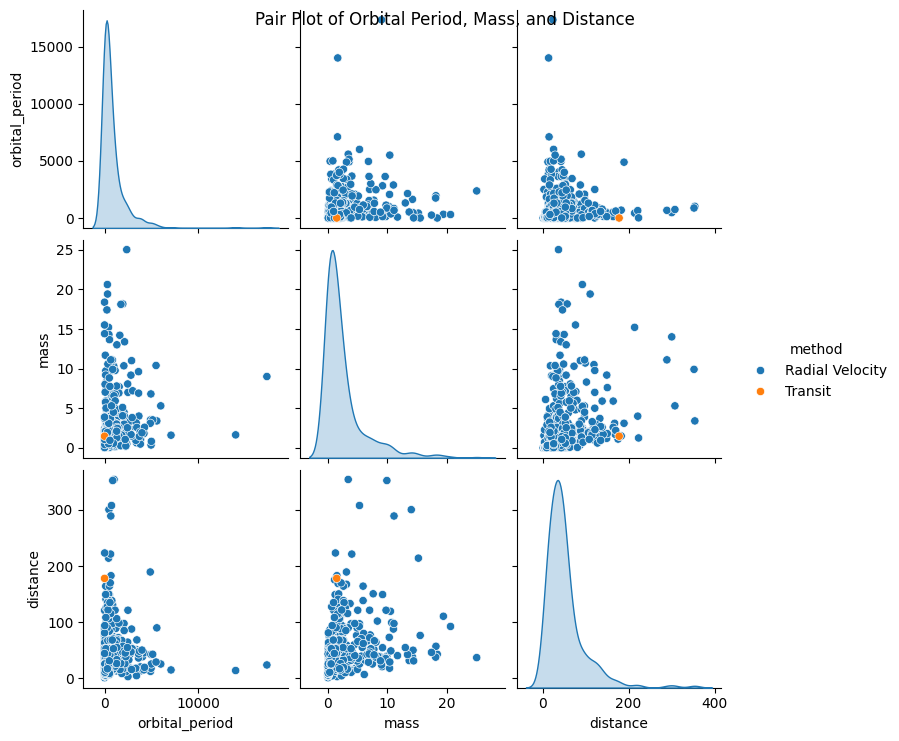

In [5]:
# Pair plot for selected variables
sns.pairplot(planets_data, vars=["orbital_period", "mass", "distance"], hue="method")
plt.suptitle("Pair Plot of Orbital Period, Mass, and Distance")
plt.show()

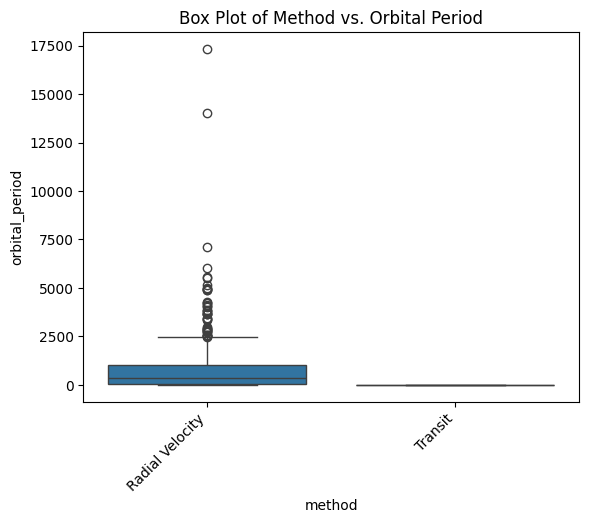

In [34]:
# Box plot of method vs. orbital period
sns.boxplot(x="method", y="orbital_period", data=planets_data)
plt.title("Box Plot of Method vs. Orbital Period")
plt.xticks(rotation=45, ha="right")
plt.show()

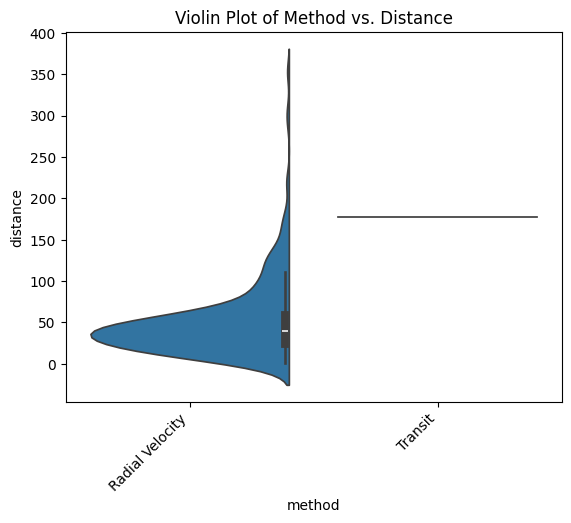

In [32]:
# Violin plot of method vs. distance
sns.violinplot(x="method", y="distance", data=planets_data, split=True)
plt.title("Violin Plot of Method vs. Distance")
plt.xticks(rotation=45, ha="right")
plt.show()

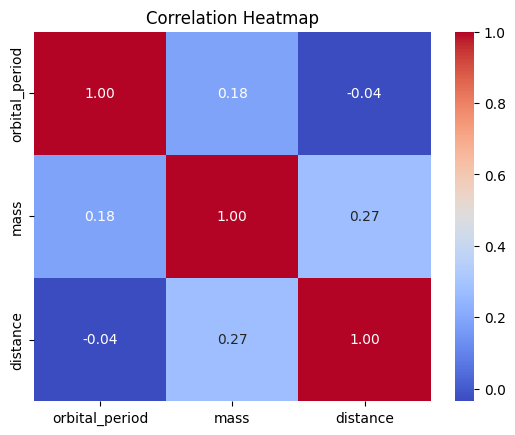

In [8]:
# Heatmap of correlations
correlation_matrix = planets_data[["orbital_period", "mass", "distance"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

c:\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python\Python312\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


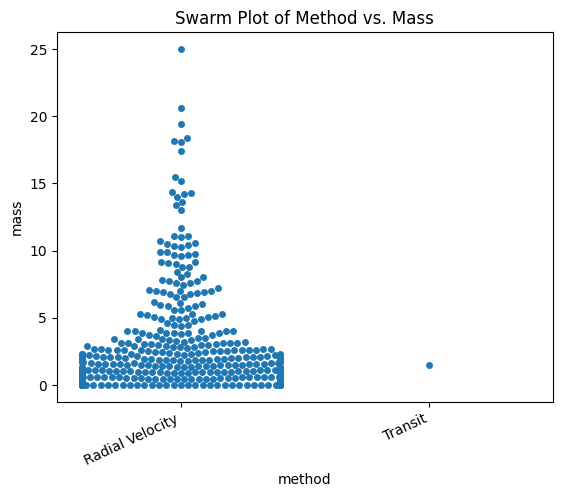

In [29]:
# Swarm plot of method vs. mass
sns.swarmplot(x="method", y="mass", data=planets_data)
plt.title("Swarm Plot of Method vs. Mass")
plt.xticks(rotation=25, ha="right")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11192\3546440856.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="orbital_period", data=planets_data, ci=None)


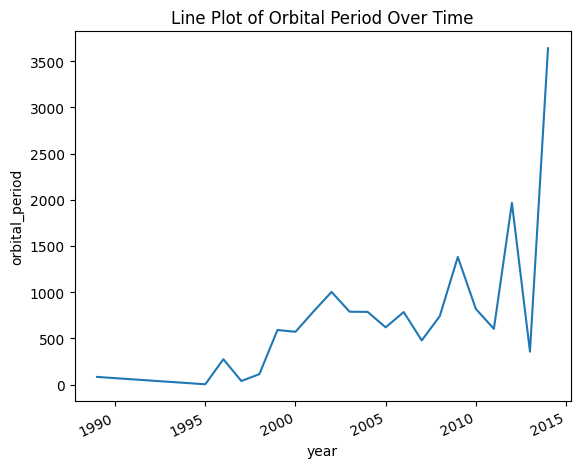

In [23]:
# Line plot of orbital period over time (assuming "year" is a time-like variable)
sns.lineplot(x="year", y="orbital_period", data=planets_data, ci=None)
plt.title("Line Plot of Orbital Period Over Time")
plt.xticks(rotation=25, ha="right")
plt.show()


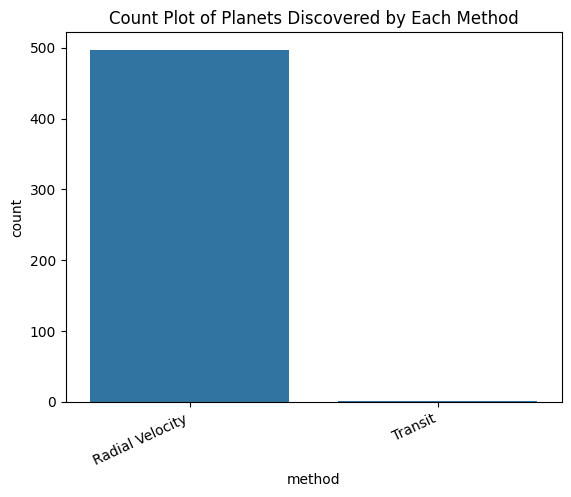

In [22]:
# Count plot of the number of planets discovered by each method
sns.countplot(x="method", data=planets_data)
plt.title("Count Plot of Planets Discovered by Each Method")
plt.xticks(rotation=25, ha="right")
plt.show()


### Extra plots

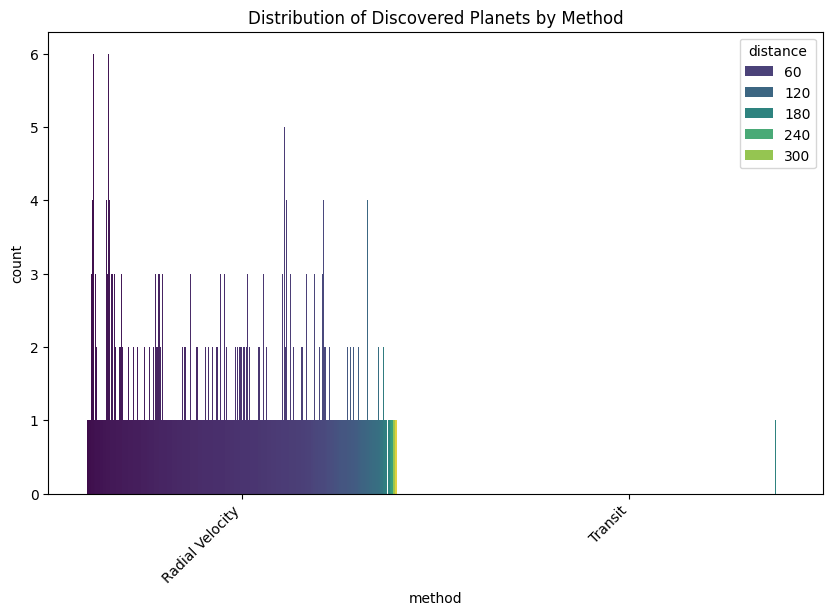

In [14]:
# Count plot of the number of planets discovered by each method
plt.figure(figsize=(10, 6))
sns.countplot(x="method", data=planets_data, palette="viridis", hue="distance")
plt.title("Distribution of Discovered Planets by Method")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7712\2331106193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="method", y="mass", data=planets_data[planets_data.mass > 0], palette="Set2")


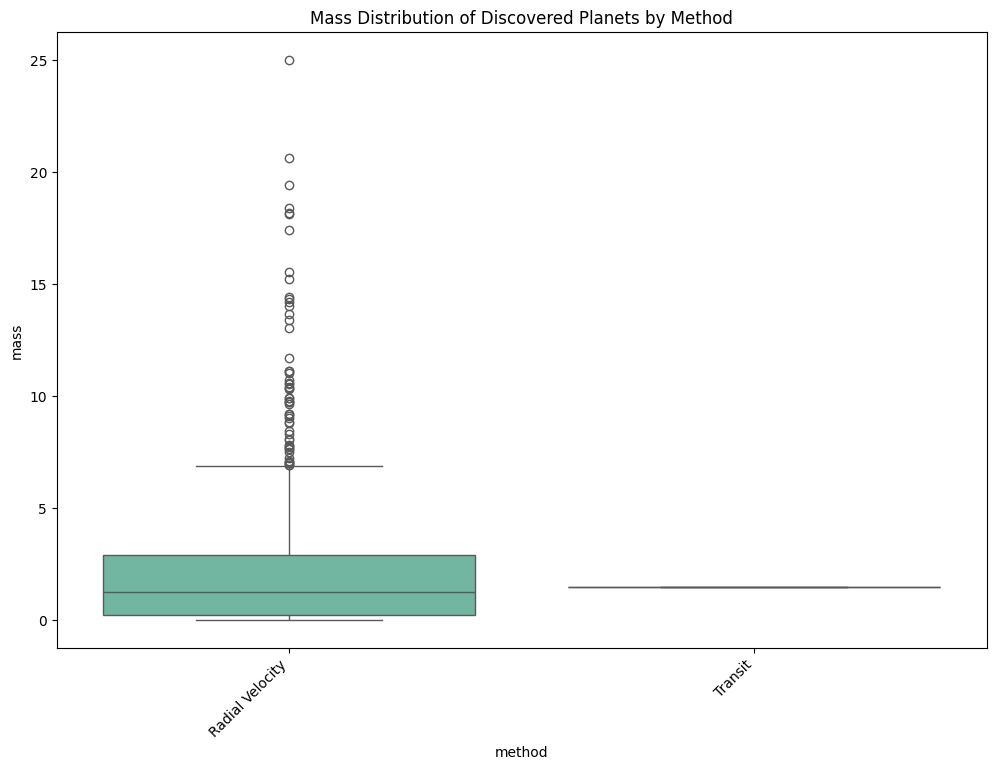

In [79]:
# Box plot of mass distribution by method
plt.figure(figsize=(12, 8))
sns.boxplot(x="method", y="mass", data=planets_data, palette="Set2")
plt.title("Mass Distribution of Discovered Planets by Method")
plt.xticks(rotation=45, ha="right")
plt.show()

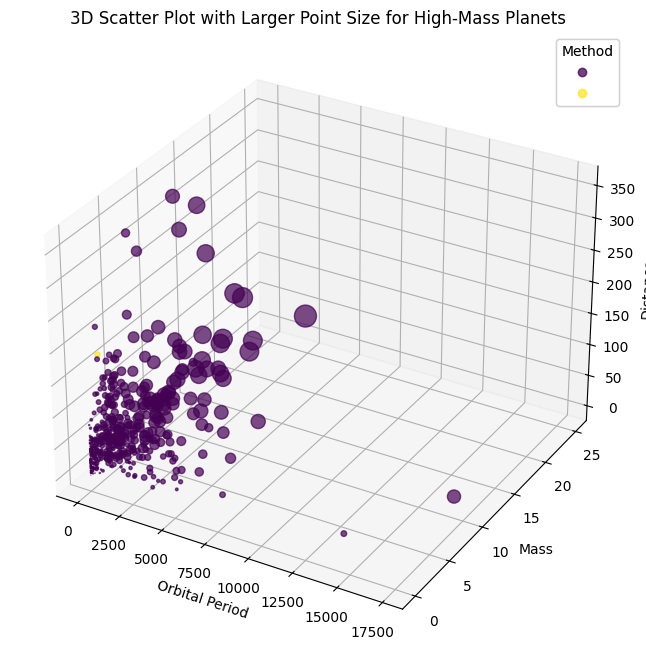

In [91]:
# Create a 3D scatter plot with larger point size for high-mass planets
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    planets_data["orbital_period"],
    planets_data["mass"],
    planets_data["distance"],
    c=planets_data["method"].astype("category").cat.codes,
    cmap="viridis",
    s=planets_data["mass"] * 10,  # Adjusting point size based on mass
    alpha=0.7,
)

legend = ax.legend(handles=scatter.legend_elements()[0], title="Method")
ax.add_artist(legend)

ax.set_xlabel("Orbital Period")
ax.set_ylabel("Mass")
ax.set_zlabel("Distance")
ax.set_title("3D Scatter Plot with Larger Point Size for High-Mass Planets")

plt.show()


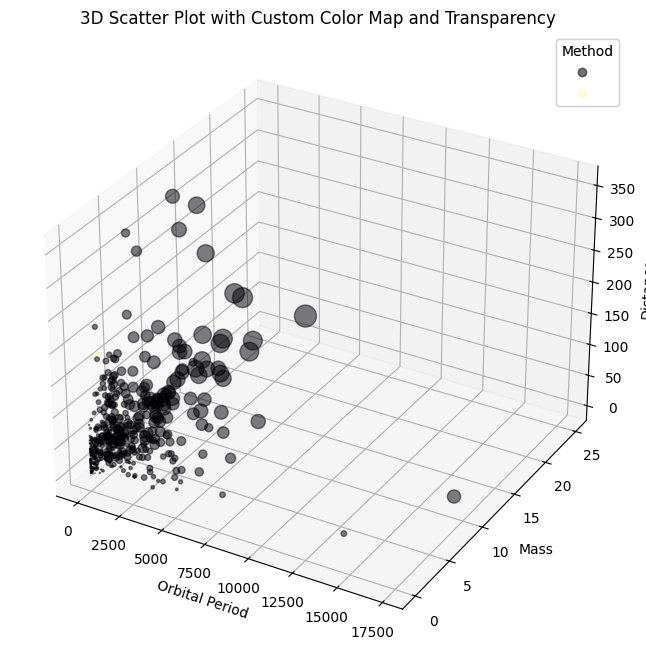

In [20]:
# Create a 3D scatter plot with a custom color map and transparency
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    planets_data["orbital_period"],
    planets_data["mass"],
    planets_data["distance"],
    c=planets_data["method"].astype("category").cat.codes,
    cmap="magma",  # Using a different colormap
    s=planets_data["mass"] * 10,  # Adjusting point size based on mass
    alpha=0.5,  # Adjusting transparency
)

legend = ax.legend(handles=scatter.legend_elements()[0], title="Method")
ax.add_artist(legend)

ax.set_xlabel("Orbital Period")
ax.set_ylabel("Mass")
ax.set_zlabel("Distance")
ax.set_title("3D Scatter Plot with Custom Color Map and Transparency")

plt.show()


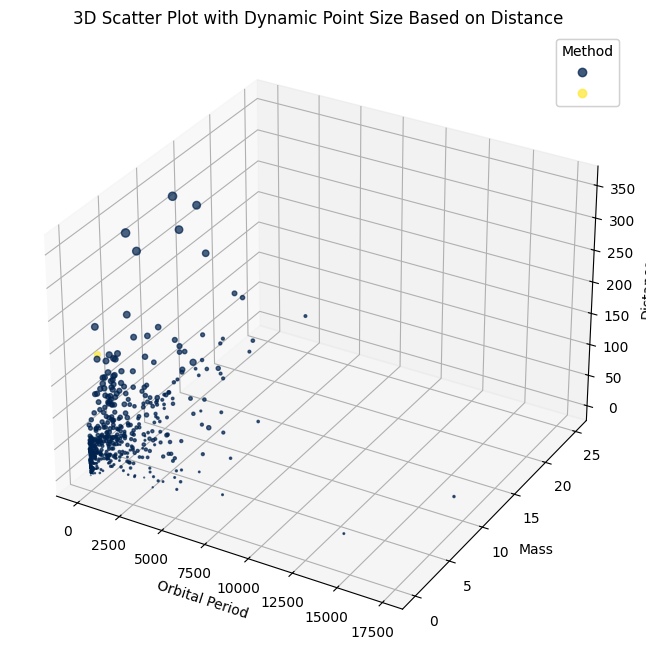

In [18]:
# Create a 3D scatter plot with dynamic point size based on distance
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Use distance to adjust point size dynamically
scatter = ax.scatter(
    planets_data["orbital_period"],
    planets_data["mass"],
    planets_data["distance"],
    c=planets_data["method"].astype("category").cat.codes,
    cmap="cividis",
    s=planets_data["distance"] / 10,
    alpha=0.7,
)

legend = ax.legend(handles=scatter.legend_elements()[0], title="Method")
ax.add_artist(legend)

ax.set_xlabel("Orbital Period")
ax.set_ylabel("Mass")
ax.set_zlabel("Distance")
ax.set_title("3D Scatter Plot with Dynamic Point Size Based on Distance")

plt.show()